In [1]:
import os
import sys
import glob
import numpy as np

import ase.atoms
import ase.io.gaussian
import ase.visualize

# need this set to represent the RMG molecule and get the rotors
DFT_DIR = os.environ['DFT_DIR']
sys.path.append(DFT_DIR)
sys.path.append(os.environ['DATABASE_DIR'])
import autotst_wrapper
import autotst.reaction
import autotst.species
import database_fun

import rmgpy.constants

import xtb.ase.calculator


import arkane.ess  # just to check our answers

import matplotlib.pyplot as plt
%matplotlib inline

/home/harris.se/rmg/RMG-Py/rmgpy/rmg/reactors.py:53: RuntimeWarning: Unable to import Julia dependencies, original error: [Errno 2] No such file or directory: 'julia': 'julia'
  warnings.warn("Unable to import Julia dependencies, original error: " + str(e), RuntimeWarning)


Loading DFT database from /work/westgroup/harris.se/autoscience/reaction_calculator/database


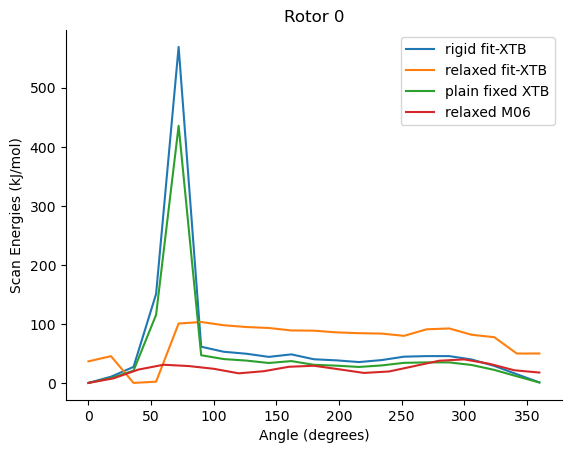

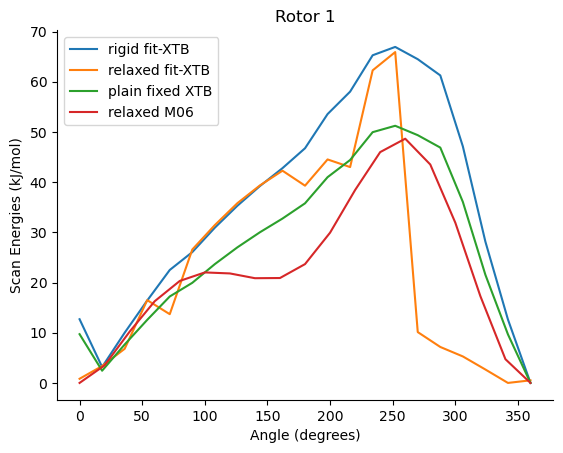

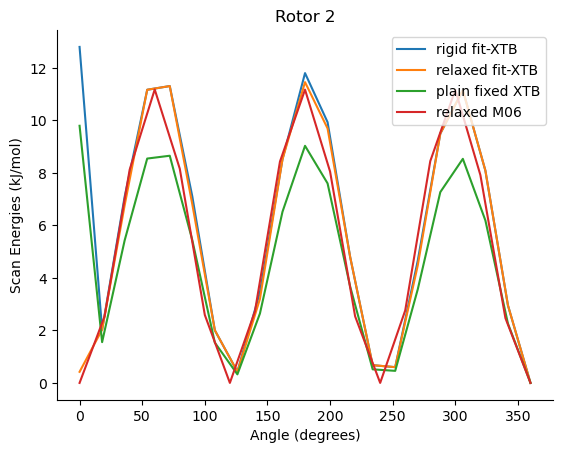

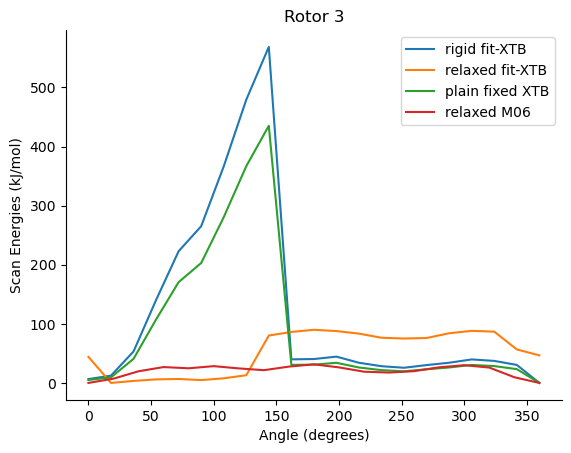

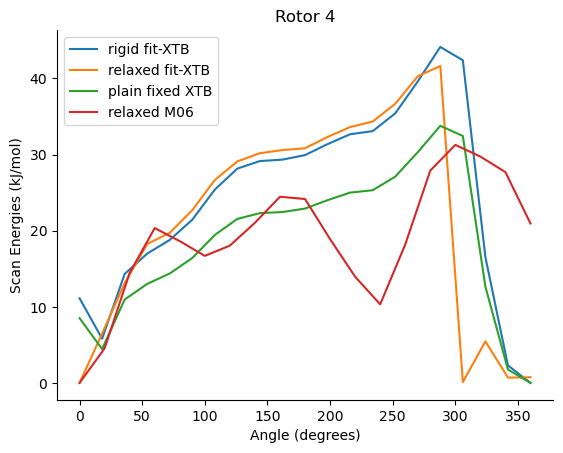

In [3]:
species_index = 84
scandir = os.path.join('/work/westgroup/harris.se/rotor_calc/attempted_scan_files', f'species_{species_index:04}')
m06_rotor_dir = os.path.join(DFT_DIR, 'thermo', f'species_{species_index:04}', 'rigid_rotors')

xtb_scanfiles = sorted(glob.glob(os.path.join(scandir, 'rotor_*_relaxed_scan_energies.txt')))
m06_scanfiles = sorted(glob.glob(os.path.join(m06_rotor_dir, 'rotor_*_scan_energies.txt')))

relaxed_scans = sorted(glob.glob(os.path.join(DFT_DIR, 'thermo', f'species_{species_index:04}', 'rotors', 'rotor_*.log')))

# assert len(xtb_scanfiles) == len(m06_scanfiles)

for rotor_index in range(len(xtb_scanfiles)):
    # xtb file better exist
    xtb_scanfile = os.path.join(scandir, f'rotor_{rotor_index:04}_scan_energies.txt')
    xtb_scanlog = arkane.statmech.ScanLog(xtb_scanfile)
    xtb_angle_units, xtb_energy_units, xtb_angles, xtb_energies = xtb_scanlog.load_text()
    plt.plot(xtb_angles, xtb_energies - np.min(xtb_energies), label='rigid fit-XTB')
    
    
    xtb_relaxed_scanfile = os.path.join(scandir, f'rotor_{rotor_index:04}_relaxed_scan_energies.txt')
    xtb_relaxed_scanlog = arkane.statmech.ScanLog(xtb_relaxed_scanfile)
    xtb_relaxed_angle_units, xtb_relaxed_energy_units, xtb_relaxed_angles, xtb_relaxed_energies = xtb_relaxed_scanlog.load_text()
    plt.plot(xtb_relaxed_angles, xtb_relaxed_energies - np.min(xtb_relaxed_energies), label='relaxed fit-XTB')
    
    
    plain_xtb_scanfile = os.path.join(scandir, f'rotor_{rotor_index:04}_plain_xtb_scan_energies.txt')
    plain_xtb_scanlog = arkane.statmech.ScanLog(plain_xtb_scanfile)
    angle_units, energy_units, angles, plain_xtb_energies = plain_xtb_scanlog.load_text()
    plt.plot(angles, plain_xtb_energies - np.min(plain_xtb_energies), label='plain fixed XTB')
    
    
#     xtb = [np.min((xtb_energies[i] - np.min(xtb_energies), xtb_relaxed_energies[i] - np.min(xtb_relaxed_energies))) for i in range(len(xtb_energies))]
#     plt.plot(xtb_relaxed_angles, xtb, label='combined fit-XTB')
    
    
    m06_scanfile = os.path.join(m06_rotor_dir, f'rotor_{rotor_index:04}_scan_energies.txt')
    if os.path.exists(m06_scanfile):
        m06_scanlog = arkane.statmech.ScanLog(m06_scanfile)
        m06_angle_units, m06_energy_units, m06_angles, m06_energies = m06_scanlog.load_text()
        assert m06_angle_units == xtb_angle_units
        assert m06_energy_units == xtb_energy_units
        plt.plot(m06_angles, m06_energies - np.min(m06_energies), label='rigid M06')
    
    relaxed_scanfile = os.path.join(DFT_DIR, 'thermo', f'species_{species_index:04}', 'rotors', f'rotor_{rotor_index:04}.log')
    if os.path.exists(relaxed_scanfile):
        relaxed_scanlog = arkane.ess.ess_factory(relaxed_scanfile)
        vlist, angles = relaxed_scanlog.load_scan_energies()
        plt.plot(angles * 180 / np.pi, vlist / 1000, label='relaxed M06')
    
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)
    plt.xlabel(f'Angle ({xtb_angle_units})')
    plt.ylabel(f'Scan Energies ({xtb_energy_units})')
    plt.title(f'Rotor {rotor_index}')
    plt.legend()
    plt.show()

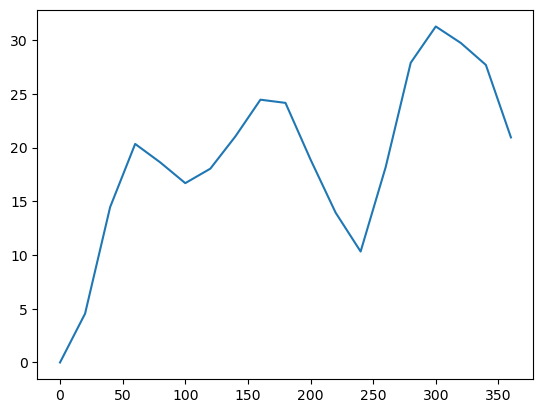

In [5]:
relaxed_scanfile = os.path.join(DFT_DIR, 'thermo', f'species_{species_index:04}', 'rotors', f'rotor_{rotor_index:04}.log')
if os.path.exists(relaxed_scanfile):
    relaxed_scanlog = arkane.ess.ess_factory(relaxed_scanfile)
    vlist, angles = relaxed_scanlog.load_scan_energies()
    plt.plot(angles * 180 / np.pi, vlist / 1000, label='relaxed M06')